In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customer_info = pd.read_csv('customer_info.csv')
product_info = pd.read_csv('product_info.csv')
sales_data = pd.read_csv('sales_data.csv')

In [3]:
#check shape of customer_info
print("Shape of customer_info:", customer_info.shape)

Shape of customer_info: (500, 6)


In [4]:
#view the dataframe of customer_info
print(customer_info.head())

  customer_id                    email signup_date  gender   region  \
0      C00001   shaneramirez@gmail.com    26-04-25    Male  Central   
1      C00002    jpeterson@bernard.com    11-08-24  Female  Central   
2      C00003  howardmaurice@yahoo.com    15-05-25    male  Central   
3      C00004      yherrera@arnold.org    14-06-25  FEMALE  Central   
4      C00005  janetwilliams@gmail.com    02-05-25    Male     West   

  loyalty_tier  
0       Silver  
1        gold   
2        gold   
3         GOLD  
4       bronze  


In [5]:
#check data types of customer_info
print("Data types of customer_info:\n", customer_info.dtypes)

Data types of customer_info:
 customer_id     object
email           object
signup_date     object
gender          object
region          object
loyalty_tier    object
dtype: object


In [6]:
#check for missing values
print(customer_info.isnull().sum())

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64


In [7]:
#change data type of 'signup date' to datetime and by month
customer_info['signup_date'] = pd.to_datetime(customer_info['signup_date'])
customer_info['signup_month'] = customer_info['signup_date'].dt.to_period('M')

In [8]:
#standardize the gender column in customer_info
customer_info['gender'] = customer_info['gender'].str.lower().str.strip()
customer_info['loyalty_tier'] = customer_info['loyalty_tier'].str.lower().str.strip()  

In [9]:
# new view of customer_info after changes
print(customer_info.head())

  customer_id                    email signup_date  gender   region  \
0      C00001   shaneramirez@gmail.com  2025-04-26    male  Central   
1      C00002    jpeterson@bernard.com  2024-11-08  female  Central   
2      C00003  howardmaurice@yahoo.com  2025-05-15    male  Central   
3      C00004      yherrera@arnold.org  2025-06-14  female  Central   
4      C00005  janetwilliams@gmail.com  2025-02-05    male     West   

  loyalty_tier signup_month  
0       silver      2025-04  
1         gold      2024-11  
2         gold      2025-05  
3         gold      2025-06  
4       bronze      2025-02  


In [10]:
#handling strange values in customer_info gender where by changing male and female to m and f
customer_info['gender'] = customer_info['gender'].replace({'male': 'm', 'female': 'f','femle': 'f' , 'm': 'm', 'f': 'f'})

In [11]:
customer_info['gender']

0        m
1        f
2        m
3        f
4        m
      ... 
495      f
496    NaN
497      m
498      f
499      m
Name: gender, Length: 500, dtype: object

In [12]:
#handle missing values in customer_info by interpolating
customer_info.interpolate('ffill', inplace=True)
#view the dataframe of customer_info after handling missing values
print(customer_info.head())

  customer_id                    email signup_date gender   region  \
0      C00001   shaneramirez@gmail.com  2025-04-26      m  Central   
1      C00002    jpeterson@bernard.com  2024-11-08      f  Central   
2      C00003  howardmaurice@yahoo.com  2025-05-15      m  Central   
3      C00004      yherrera@arnold.org  2025-06-14      f  Central   
4      C00005  janetwilliams@gmail.com  2025-02-05      m     West   

  loyalty_tier signup_month  
0       silver      2025-04  
1         gold      2024-11  
2         gold      2025-05  
3         gold      2025-06  
4       bronze      2025-02  


In [13]:
#check for null values
print(customer_info.isnull().sum())

customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
signup_month    0
dtype: int64


In [14]:
#check for NaN values
print(customer_info.isna().sum())

customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
signup_month    0
dtype: int64


In [15]:
#check for duplicates
print("Duplicates in customer_info:", customer_info.duplicated().sum())

Duplicates in customer_info: 0


In [16]:
#display sales data info
print("Shape of sales_data:", sales_data.shape)

Shape of sales_data: (3000, 10)


In [17]:
#show the info of sales_data
print("Info of sales_data:\n", sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2997 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB
Info of sales_data:
 None


In [18]:
#view the dframe of sales_data
print(sales_data.head())

  order_id customer_id product_id quantity  unit_price order_date  \
0  O966977      C00397      P0022        3       39.25   06-07-25   
1  O696648      C00236      P0023        5       18.92   06-07-25   
2  O202644      C00492      P0011        1       29.68   06-07-25   
3  O501803      C00031      P0003        1       32.76   06-07-25   
4  O322242      C00495      P0016        1       47.62   06-07-25   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
3      Cancelled     Credit Card  Central              0.20  
4         DELAYED    Credit Card     West              0.20  


In [19]:
#check for missing values
print("Missing values in sales_data:\n", sales_data.isnull().sum())

Missing values in sales_data:
 order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64


In [20]:
#fill missing values for quantity with  with mode
sales_data['quantity'].fillna(sales_data['quantity'].mode()[0], inplace=True)
#fill missing values for unit_price with mean
sales_data['unit_price'].fillna(sales_data['unit_price'].mean(), inplace=True) 
#fill missing values for discount_applied with 0
sales_data['discount_applied'].fillna(0, inplace=True)   


In [21]:
#change order_date to datetime
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

In [22]:
#standardizing delivery_status and payment_method
sales_data['delivery_status'] = sales_data['delivery_status'].str.lower().str.strip()
sales_data['payment_method'] = sales_data['payment_method'].str.lower().str.strip()

In [23]:
#interpolate missing values in sales_data
sales_data.interpolate('ffill', inplace=True)

In [24]:
#check for missing values after interpolation
print("Missing values in sales_data after interpolation:\n", sales_data.isnull().sum())

Missing values in sales_data after interpolation:
 order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64


In [25]:
#check for Nan values after interpolation
print("NaN values in sales_data after interpolation:\n", sales_data.isna().sum())

NaN values in sales_data after interpolation:
 order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64


In [26]:
#change the values of 'quantity' that are different.like from string to int
sales_data['quantity'] = pd.to_numeric(sales_data['quantity'], errors='coerce')



In [27]:
sales_data['quantity'].isnull().sum()  # Check if there are any NaN values after conversion

2

In [28]:
#handling the null values in quantity column
sales_data['quantity'].fillna(sales_data['quantity'].mode()[0], inplace=True)

In [29]:
sales_data.head()
#check for null values in sales_data
print("Null values in sales_data:\n", sales_data.isnull().sum())

Null values in sales_data:
 order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64


In [30]:
product_info.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [31]:
#check data types of product_info
print("Data types of product_info:\n", product_info.dtypes)

Data types of product_info:
 product_id        object
product_name      object
category          object
launch_date       object
base_price       float64
supplier_code     object
dtype: object


In [32]:
#info of product_info
print("Info of product_info:\n", product_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB
Info of product_info:
 None


In [33]:
#number of unique values in product_info
print("Unique values in product_info:\n", product_info.nunique())

Unique values in product_info:
 product_id       30
product_name     30
category          5
launch_date      29
base_price       30
supplier_code    30
dtype: int64


In [34]:
# null values in product_info
print("Null values in product_info:\n", product_info.isnull().sum())

Null values in product_info:
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64


In [35]:
#NAN values in product_info
print("NaN values in product_info:\n", product_info.isna().sum())

NaN values in product_info:
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64


In [36]:
#change launch_date to datetime
product_info['launch_date'] = pd.to_datetime(product_info['launch_date'])
# change base_price to numeric
product_info['base_price'] = pd.to_numeric(product_info['base_price'], errors='coerce')

In [37]:
#check for duplicates in product_info
print("Duplicates in product_info:", product_info.duplicated().sum())

Duplicates in product_info: 0


In [38]:
#merge sales_data with customer_info on product_id
nsales_data = pd.merge(sales_data, product_info, on='product_id', how='left')
nsales_data.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied,product_name,category,launch_date,base_price,supplier_code
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,delivered,paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,delayed,credit card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907
2,O202644,C00492,P0011,1.0,29.68,2025-06-07,delivered,bank transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645
3,O501803,C00031,P0003,1.0,32.76,2025-06-07,cancelled,credit card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
4,O322242,C00495,P0016,1.0,47.62,2025-06-07,delayed,credit card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715


In [39]:
merged_df = pd.merge(nsales_data, customer_info, on='customer_id', how='left')
# Display the first few rows of the merged DataFrame
print(merged_df.head())


  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022       3.0       39.25 2025-06-07   
1  O696648      C00236      P0023       5.0       18.92 2025-06-07   
2  O202644      C00492      P0011       1.0       29.68 2025-06-07   
3  O501803      C00031      P0003       1.0       32.76 2025-06-07   
4  O322242      C00495      P0016       1.0       47.62 2025-06-07   

  delivery_status payment_method region_x  discount_applied  ...  category  \
0       delivered         paypal  Central              0.00  ...  Cleaning   
1         delayed    credit card    North              0.00  ...  Outdoors   
2       delivered  bank transfer    North              0.15  ...   Kitchen   
3       cancelled    credit card  Central              0.20  ...  Cleaning   
4         delayed    credit card     West              0.20  ...  Cleaning   

  launch_date base_price  supplier_code                             email  \
0  2024-04-10      19.77         

In [40]:
#solving the issue of different region columns by changing region_x to order_region and region_y to customer_region
merged_df.rename(columns={'region_x': 'order_region', 'region_y': 'customer_region'}, inplace=True)


In [41]:
#changing the nrth value in order_region to north
merged_df['order_region'] = merged_df['order_region'].replace({'nrth': 'North'})

In [42]:
#changing the values in loyalty_tier of gld, sllver, brnze to gold, silver, bronze
merged_df['loyalty_tier'] = merged_df['loyalty_tier'].replace({
    'gld': 'gold',
    'sllver': 'silver',
    'brnze': 'bronze'
})

In [43]:
#listung the unique values in loyalty_tier
print("Unique values in loyalty_tier:", merged_df['loyalty_tier'].unique())

Unique values in loyalty_tier: ['silver' 'gold' 'bronze' nan]


In [44]:
#nan values in merged_df
print("NaN values in merged_df:\n", merged_df.isna().sum())

NaN values in merged_df:
 order_id             0
customer_id          0
product_id           0
quantity             0
unit_price           0
order_date           0
delivery_status      0
payment_method       0
order_region         0
discount_applied     0
product_name         0
category             0
launch_date          0
base_price           0
supplier_code        0
email               24
signup_date         24
gender              24
customer_region     24
loyalty_tier        24
signup_month        24
dtype: int64


In [45]:
merged_df.duplicated().sum()  # Check for duplicates in the merged DataFrame

0

In [46]:
#handling missing values in merged_df
merged_df.interpolate('ffill', inplace=True)

In [47]:
merged_df.isna().sum()  # Check if there are any NaN values after interpolation

order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
order_region        0
discount_applied    0
product_name        0
category            0
launch_date         0
base_price          0
supplier_code       0
email               0
signup_date         0
gender              0
customer_region     0
loyalty_tier        0
signup_month        0
dtype: int64

In [48]:
merged_df['loyalty_tier'].unique()  # Check unique values in payment_method

array(['silver', 'gold', 'bronze'], dtype=object)

In [49]:
merged_df['payment_method'] = merged_df['payment_method'].replace({'bank transfr': 'bank transfer'})

In [50]:
merged_df['delivery_status'] = merged_df['delivery_status'].replace({'delrd': 'delivered', 'delyd': 'delayed'})

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
#create revenue column in merged_df
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])
#create order week column in merged_df by ISO week from order_date
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])
merged_df['order_week'] = merged_df['launch_date'].dt.to_period('W').apply(lambda r: r.start_time)
# label encode the order week column to represent the number of weeks
merged_df['order_week'] = le.fit_transform(merged_df['order_week'].astype(str))

#create price band column to categorize unit_price low <15, medium 15-30, high >30 using pd.cut
price_bins = [0, 15, 30, np.inf]
price_labels = ['low', 'medium', 'high']
merged_df['price_band'] = pd.cut(merged_df['unit_price'], bins=price_bins, labels=price_labels, right=False)
#days_to_order column to calculate the number of days between order_date and launch_date
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days
#email_domain column to extract the domain from email
merged_df['email_domain'] = merged_df['email'].str.split('@').str[1]
#is_late column to check if the order was delivered late
merged_df['is_late'] = merged_df['delivery_status'].apply(lambda x: 'late' in x.lower() if isinstance(x, str) else False)    

In [52]:
merged_df.columns

Index(['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price',
       'order_date', 'delivery_status', 'payment_method', 'order_region',
       'discount_applied', 'product_name', 'category', 'launch_date',
       'base_price', 'supplier_code', 'email', 'signup_date', 'gender',
       'customer_region', 'loyalty_tier', 'signup_month', 'revenue',
       'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late'],
      dtype='object')

In [86]:
#create summary table for weekly revenue trends by region
weekly_revenue = merged_df.groupby(['order_week', 'order_region'])['revenue'].sum().reset_index()
#weekly_revenue['order_week'] = weekly_revenue['order_week'].dt.to_period('W').astype(str)  # Convert to string for better readability   
# Display the first few rows of the weekly revenue DataFrame
print(weekly_revenue.head())

   order_week order_region   revenue
0           0      Central  1545.024
1           0         East  2385.002
2           0        North  1301.647
3           0        South  1701.156
4           0         West  1737.556


In [88]:
#create summary table for weekly revenue trends by region
weekly_revenue2 = merged_df.groupby(['order_week', 'customer_region'])['revenue'].sum().reset_index()
#weekly_revenue2['order_week'] = weekly_revenue2['order_week'].dt.to_period('W').astype(str)  # Convert to string for better readability   
# Display the first few rows of the weekly revenue DataFrame
print(weekly_revenue2.head())

   order_week customer_region    revenue
0           0         Central  1027.9365
1           0            East  1497.6815
2           0           North  2217.6655
3           0           South  1838.8745
4           0            West  2088.2270


In [95]:
#summary table for product category performance based on revenue, quantity, discount_applied
product_performance = merged_df.groupby('category').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'discount_applied': 'mean',
    'customer_region': 'first'  # Assuming you want to keep the first region for each category
}).reset_index().sort_values(by='revenue', ascending=False)
product_performance

,category,revenue,quantity,discount_applied,customer_region
0,Cleaning,94602.349000,3623.0,0.085791,North
4,Storage,47420.395000,1751.0,0.081357,North
2,Outdoors,40762.238321,1543.0,0.082490,North
1,Kitchen,34422.126500,1245.0,0.075184,Central
3,Personal Care,25159.302500,910.0,0.086842,North


In [55]:
# customer behavior analysis by loyalty_tier and signup_month 
customer_behavior = merged_df.pivot_table(
    index='signup_month',
    columns='loyalty_tier',
    values='revenue',
    aggfunc='sum'
).fillna(0)
customer_behavior 

loyalty_tier,bronze,gold,silver
signup_month,,,
2024-01,478.6450,2393.4265,1197.980000
2024-02,1843.8570,1234.4165,476.212000
2024-03,1142.6895,1014.6070,1658.059000
2024-04,71.2800,1405.8385,1038.923500
2024-05,273.6810,1500.5765,0.000000
2024-06,0.0000,5888.8805,672.771000
2024-07,3119.1245,9040.3655,1965.787500
2024-08,3065.1350,10851.6760,4060.776000
2024-09,2685.6645,13053.0250,3802.221000


In [94]:
#summary table for delivery performance by region and price_band
delivery_performance = merged_df.groupby(['order_region', 'price_band']).agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'discount_applied': 'mean'
    }).reset_index().sort_values(by='revenue', ascending=False)
delivery_performance

,order_region,price_band,revenue,quantity,discount_applied
11,South,high,34305.745500,940.0,0.089500
8,North,high,31309.653000,870.0,0.088136
14,West,high,30780.175500,857.0,0.086667
5,East,high,30698.088000,813.0,0.077037
2,Central,high,30236.944500,814.0,0.078947
13,West,medium,15180.742000,720.0,0.085425
4,East,medium,15037.418821,729.0,0.080705
1,Central,medium,14071.107000,673.0,0.085619
7,North,medium,12719.976500,597.0,0.079087
10,South,medium,12658.757500,594.0,0.076866


In [57]:
#summary table for preferred payment methods by loyalty_tier
payment_methods = merged_df.groupby(['loyalty_tier', 'payment_method']).size().reset_index(name='count')
payment_methods = payment_methods.sort_values(by='count', ascending=False)
payment_methods


,loyalty_tier,payment_method,count
4,gold,credit card,851
5,gold,paypal,435
3,gold,bank transfer,408
7,silver,credit card,325
1,bronze,credit card,287
6,silver,bank transfer,197
0,bronze,bank transfer,183
8,silver,paypal,170
2,bronze,paypal,165


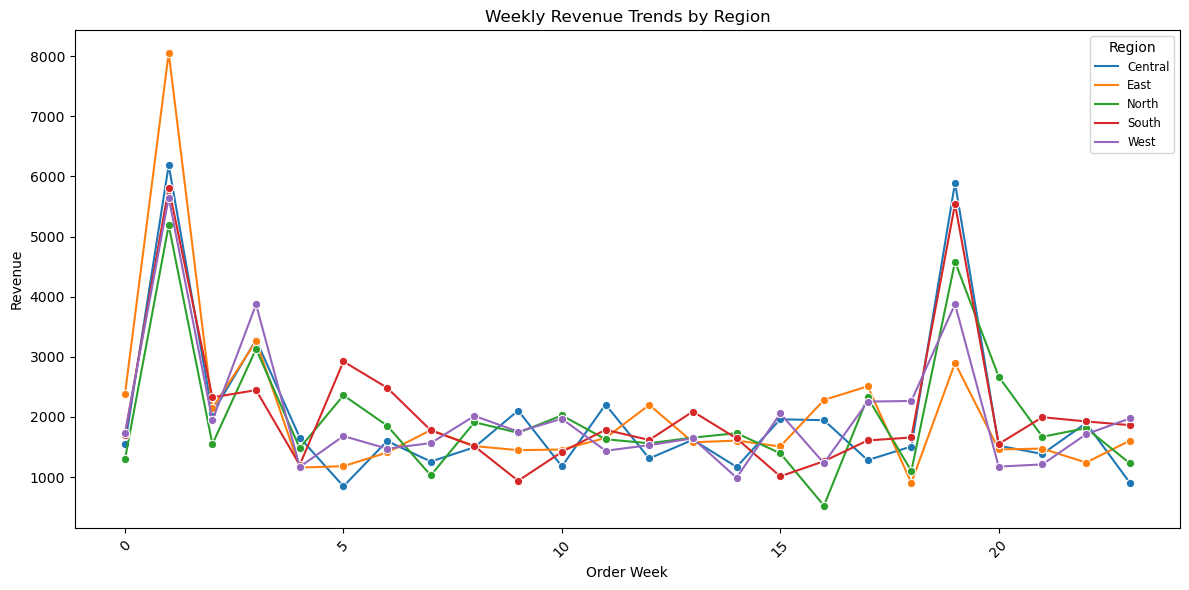

In [91]:
#line plot for weekly revenue trends by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_revenue, x='order_week', y='revenue', hue='order_region', marker='o')
#add bar plot of categories and revenue
#sns.barplot(data=product_performance, x='category', y='revenue', alpha=0.3, dodge=True)
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('Order Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
#make the legend title smaller
plt.legend(title='Region', fontsize='small')
plt.tight_layout()
# Save the plot
plt.savefig('weekly_revenue_trends_by_region.png')

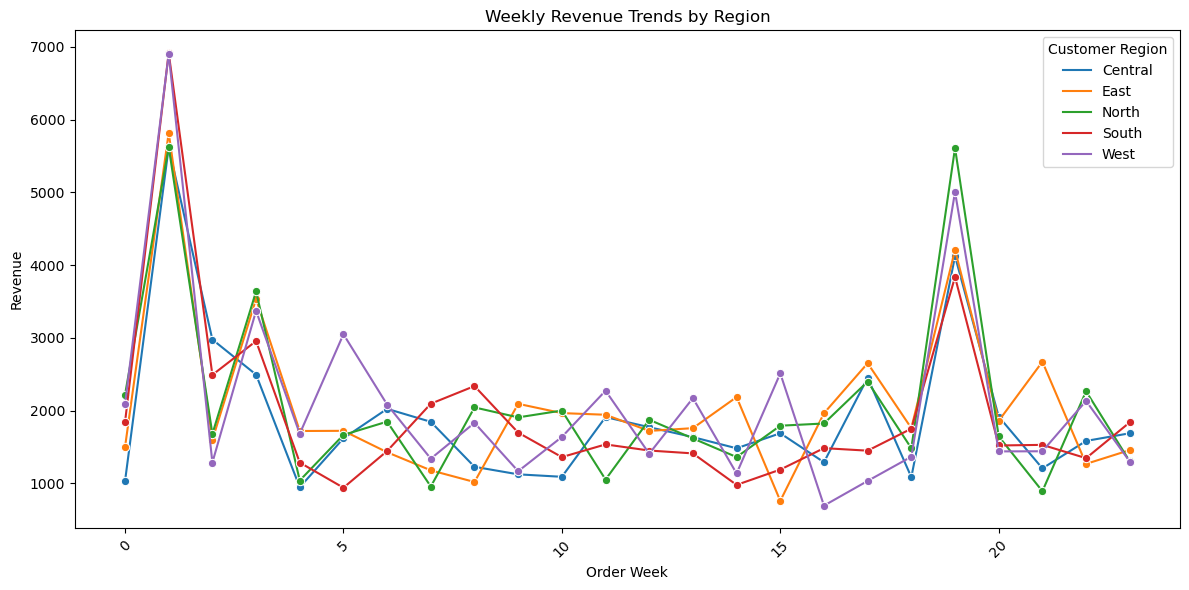

In [92]:
#line plot for weekly revenue trends by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_revenue2, x='order_week', y='revenue', hue='customer_region', marker='o')
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('Order Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Customer Region')
plt.tight_layout()
# Save the plot
plt.savefig('weekly_revenue_trends_by_curegion.png')

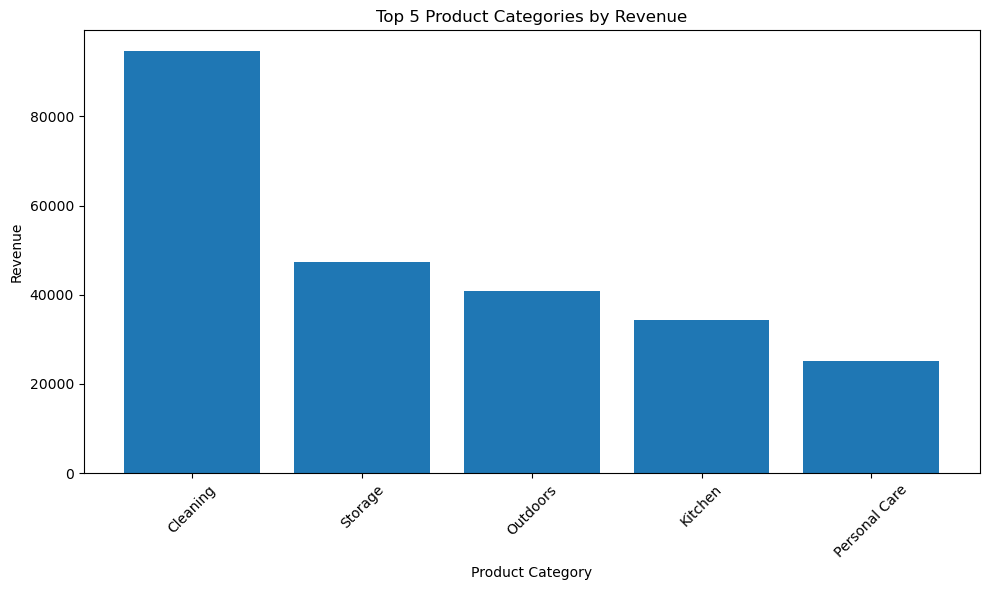

In [59]:
#top 5 categories by revenue using bar chart
plt.figure(figsize=(10, 6))
plt.bar(product_performance['category'], product_performance['revenue']) 
plt.title('Top 5 Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_product_categories_by_revenue.png')
plt.show()

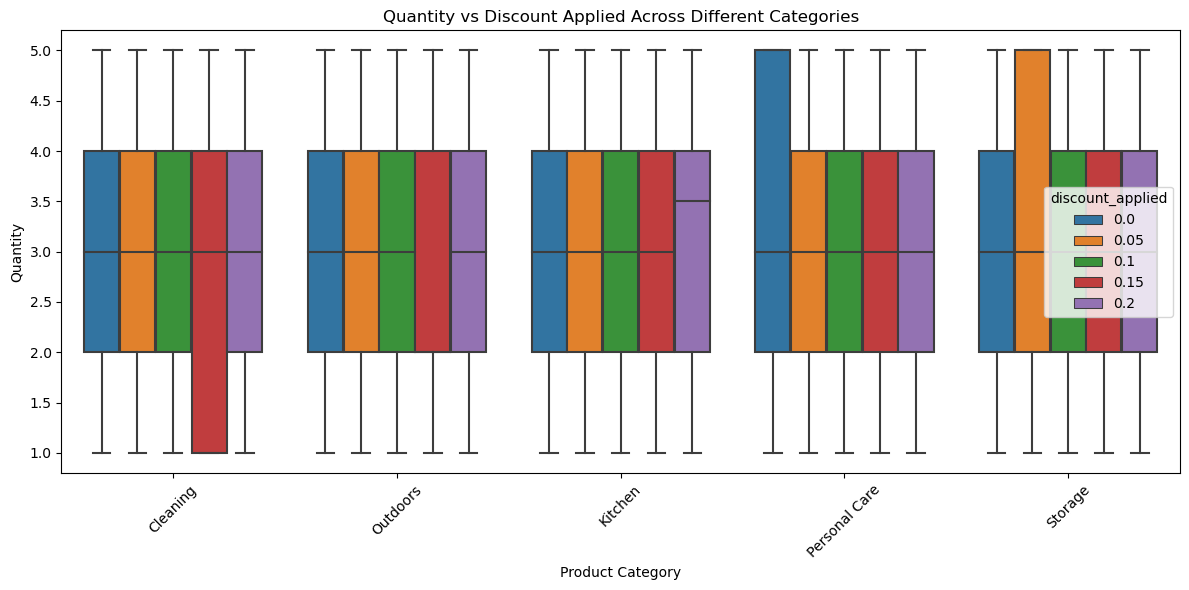

In [60]:
#boxplot of quantity vs discount_applied across different categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='category', y='quantity', hue='discount_applied')
plt.title('Quantity vs Discount Applied Across Different Categories')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('quantity_vs_discount_applied_by_category.png')

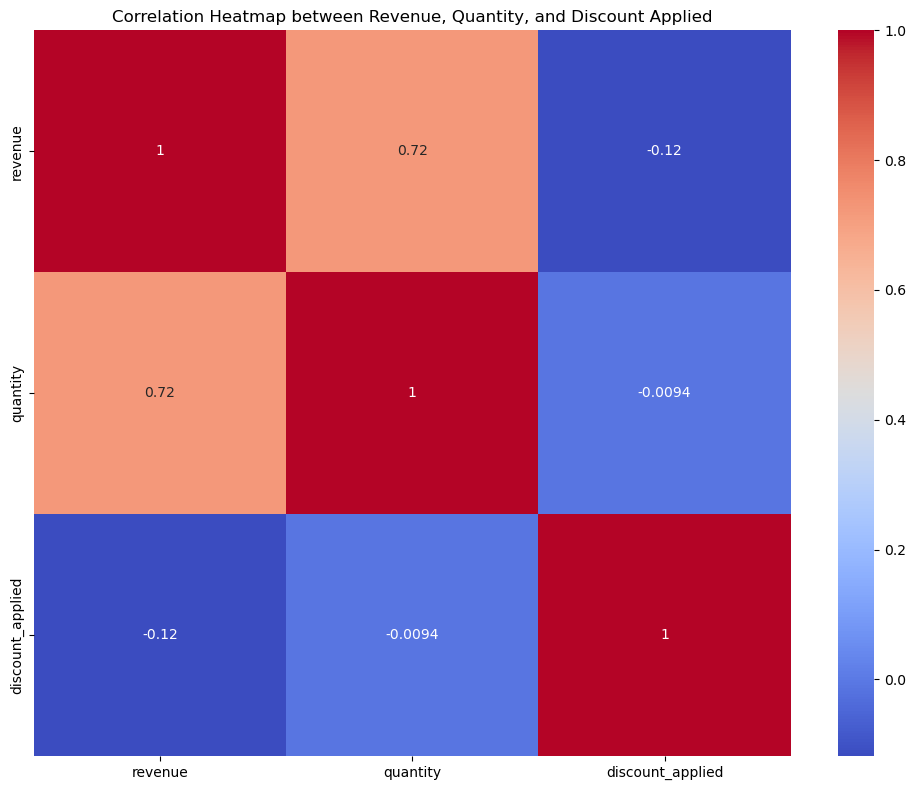

In [61]:
#heatmap between revenue, quantity, and discount_applied
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[['revenue', 'quantity', 'discount_applied']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Revenue, Quantity, and Discount Applied')
plt.tight_layout()
plt.savefig('correlation_heatmap_revenue_quantity_discount.png')
plt.show()

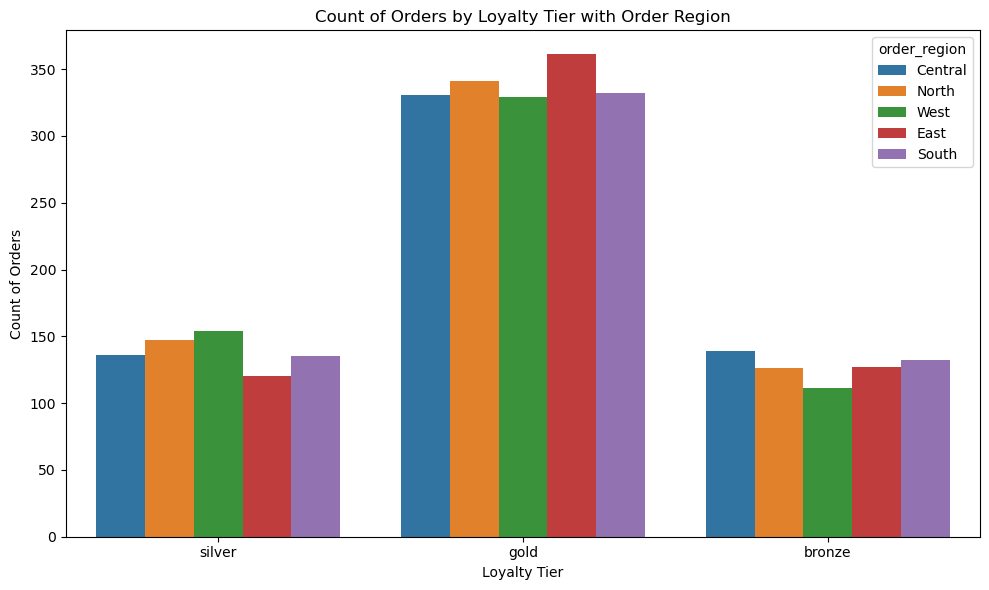

In [62]:
#countplot of orders by loyalty_tier with  order_region as the hue
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='loyalty_tier', hue='order_region')
plt.title('Count of Orders by Loyalty Tier with Order Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Count of Orders')
plt.tight_layout()
plt.savefig('count_of_orders_by_loyalty_tier.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

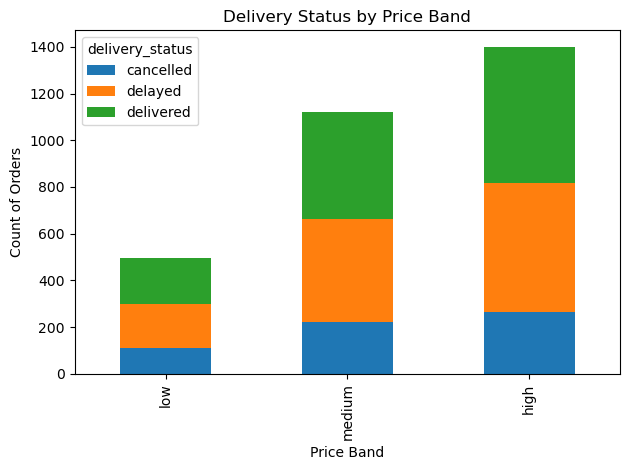

In [63]:
#stacked bar of delivery status by price band
plt.figure(figsize=(10, 6))
delivery_status_counts = merged_df.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)
delivery_status_counts.plot(kind='bar', stacked=True)   
plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Count of Orders')
plt.tight_layout()
plt.savefig('delivery_status_by_price_band.png')
plt.show()